In [13]:
"""
===============
KAZR Example
===============

Example notebook on how to use ACT to 
Download, Read, and Plot KAZR Data

"""
import act
import glob
import matplotlib.pyplot as plt
import json

In [14]:
#Read in ARM Live Data Webservice Token and Username
#Get a token and sign up here: https://adc.arm.gov/armlive/
#token.json format
#{
#    "username": "name",
#    "token": "longtoken1243"
#}
with open('./token.json') as f:
    data = json.load(f)
username = data['username']
token = data['token']

In [15]:
#Set up datastream name and dates to download
datastream = 'sgpkazrgeC1.a1'
startdate = '2019-06-09'
enddate = '2019-06-09'

In [18]:
#Download KAZR Data
files = glob.glob(''.join(['./',datastream,'/*cdf']))
if len(files) == 0:
    act.discovery.download_data(username, token, datastream, startdate, enddate)
    files = glob.glob(''.join(['./',datastream,'/*cdf']))

In [19]:
#Read in KAZR data using ACT to Standard Object
kazr_obj = act.io.armfiles.read_netcdf(files)

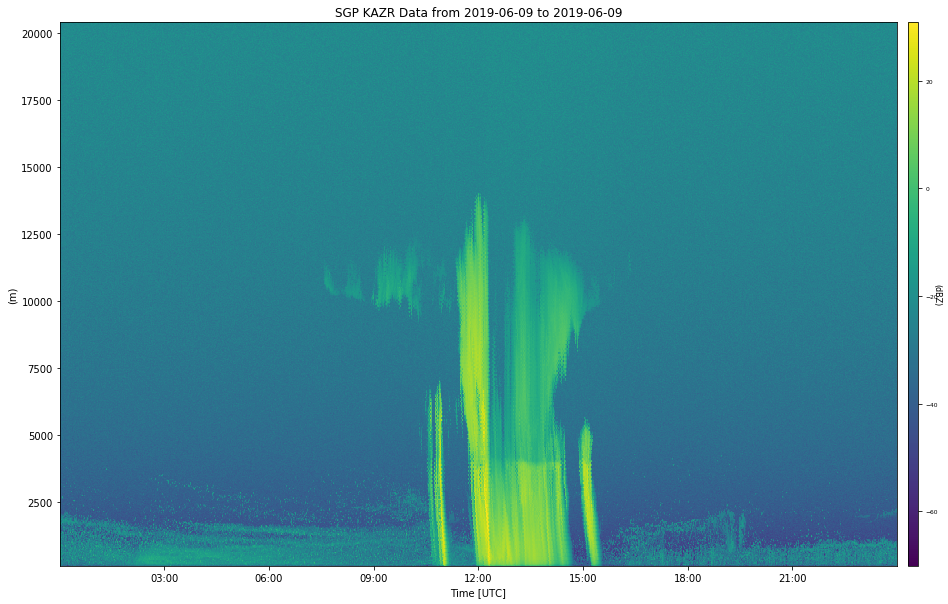

In [12]:
#Plot Data
display = act.plotting.TimeSeriesDisplay(kazr_obj,figsize=(15,10),subplot_shape=(1,))
title = 'SGP KAZR Data from '+startdate+' to '+enddate
display.plot('reflectivity_copol',set_title=title,subplot_index=(0,))
plt.show()